In [2]:
import pandas as pd
import numpy as np
from plot import ov_plot as plot
from sklearn.linear_model import LinearRegression
from time import time
from numba import njit

In [3]:
# Sqaured Error Cost Function
@njit
def sec(X, Y, w, b):
    y_pred = w * X + b
    error = y_pred - Y
    cost = (1 / (2 * X.size)) * np.sum(error ** 2)
    return cost

In [4]:
def predict(x_train, y_train, x_test, y_test):
    st = time()
    reg = LinearRegression().fit(x_train, y_train)
    ed = time()

    slope = reg.coef_[0]
    intercept = reg.intercept_
    test_cost = sec(x_test, y_test, slope, intercept)
    train_cost = sec(x_train, y_train, slope, intercept)

    print("Train Cost: ", train_cost)
    print("Test Cost: ", test_cost)
    print(f"(w, b) = ({slope:.4f}, {intercept:.4f})")
    print(f"time: {(ed - st):.4f}")

    plot(slope, intercept, test_cost)

Train Cost:  3.527980799611933e+16
Test Cost:  3.5399177596850084e+16
(w, b) = (11987668.0443, 2816519.7527)
time: 1.3027


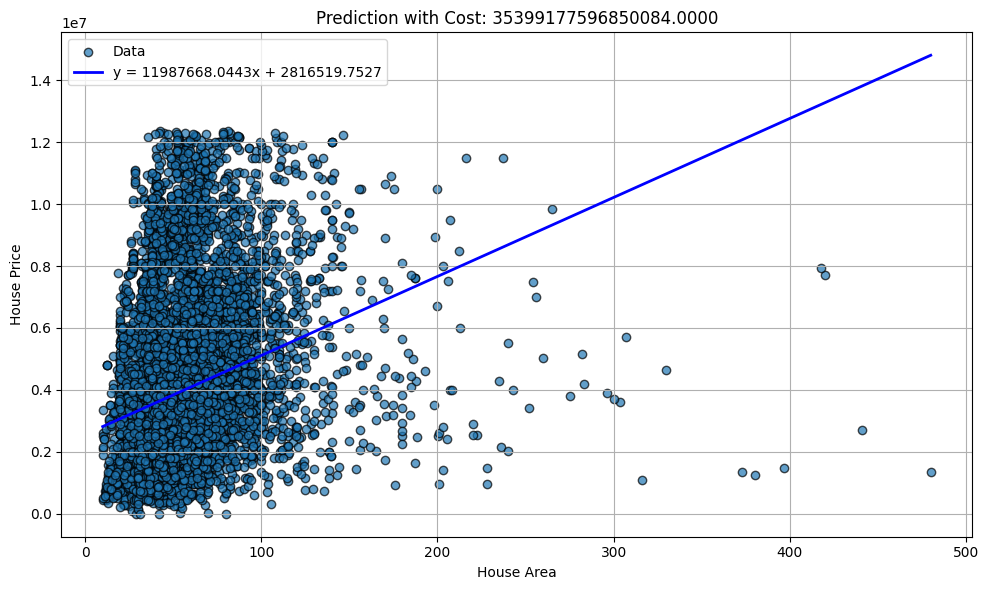

In [ ]:
if __name__ == "__main__":
    # Data Processing
    ## Train on processed data and test on actual data
    data = pd.read_csv("house_price.csv")
    # 70 : 30 ratio
    train_data = data[:7950705]
    test_data = data[7950705:]
    
    x_train_total = train_data['area'].to_numpy()
    y_train_total = train_data['price'].to_numpy()

    x_test_total = test_data['area'].to_numpy()
    y_test_total = test_data['price'].to_numpy()


    # Normalization
    x_min, x_max = x_train_total.min(), x_train_total.max()
    scaling = lambda x: (x - x_min) / (x_max - x_min)

    x_train = scaling(x_train_total).astype(np.float64).reshape(-1, 1)
    x_test = scaling(x_test_total).astype(np.float64).reshape(-1, 1)
    y_train = y_train_total.astype(np.float64)
    y_test = y_test_total.astype(np.float64)
    
    predict(x_train[:10000], y_train[:10000], x_test[:10000], y_test[:10000])